Unzip datasets and prepare data:

In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from multi_imbalance.datasets import load_datasets

from multi_imbalance.resampling.SOUP import SOUP
from multi_imbalance.utils.data import construct_flat_2pc_df

%matplotlib inline
sns.set_style('darkgrid')

dataset = load_datasets()['cleveland']

X, y = dataset.data, dataset.target
print(X[:5])
print(y[:5])

[[ 63.    1.    1.  145.  233.    1.    2.  150.    0.    2.3   3.    0.
    6. ]
 [ 67.    1.    4.  160.  286.    0.    2.  108.    1.    1.5   2.    3.
    3. ]
 [ 67.    1.    4.  120.  229.    0.    2.  129.    1.    2.6   2.    2.
    7. ]
 [ 37.    1.    3.  130.  250.    0.    0.  187.    0.    3.5   3.    0.
    3. ]
 [ 41.    0.    2.  130.  204.    0.    2.  172.    0.    1.4   1.    0.
    3. ]]
[0 2 1 0 0]


Resample data using SOUP algorithm

In [2]:
clf = SOUP()
resampled_X, resampled_y = clf.fit_transform(X, y, shuffle=False)

Compare results by plotting data in 2 dimensions

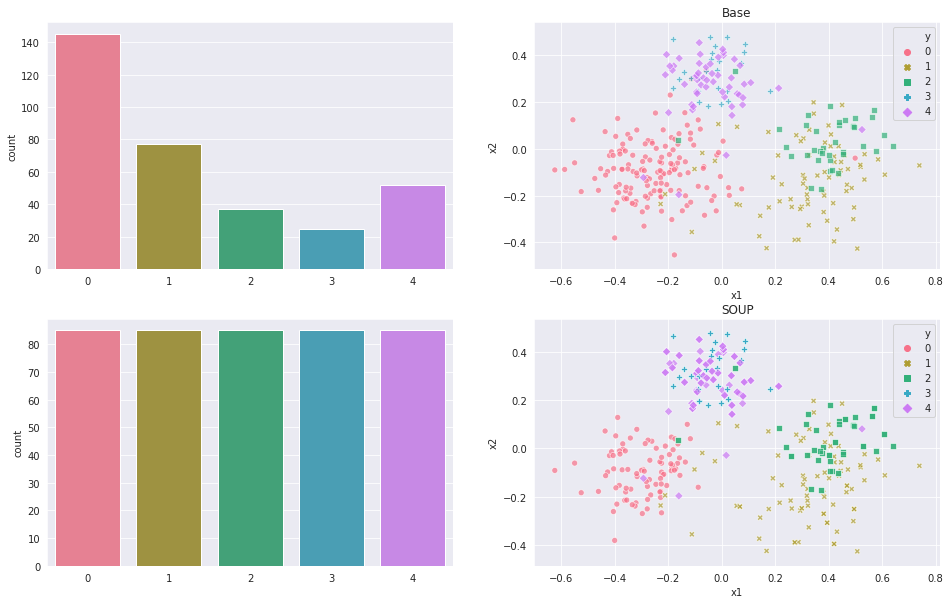

In [3]:

n = len(Counter(y).keys())
p = sns.color_palette("husl", n)

pca = PCA(n_components=2)
pca.fit(X)

fig, axs = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches( 16, 10)
axs = axs.flatten()

axs[1].set_title("Base")
sns.countplot(y, ax=axs[0], palette=p)
X = pca.transform(X)
df = construct_flat_2pc_df(X, y)
sns.scatterplot(x='x1', y='x2', hue='y', style='y', data=df, alpha=0.7, ax=axs[1], legend='full', palette=p)


axs[3].set_title("SOUP")
sns.countplot(resampled_y, ax=axs[2],palette=p)
resampled_X = pca.transform(resampled_X)
df = construct_flat_2pc_df(resampled_X, resampled_y)
sns.scatterplot(x='x1', y='x2', hue='y', style='y', data=df, alpha=0.7, ax=axs[3], legend='full', palette=p)